In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv("C:/Users/procns/Desktop/인공지능/Homework/HW_3/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
X_data = data['YearsExperience']
y_data = data['Salary']

In [5]:
X_data.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [6]:
y_data.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

<Axes: xlabel='YearsExperience', ylabel='Salary'>

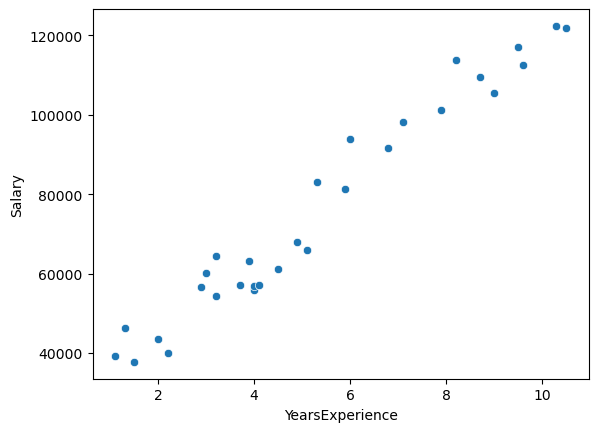

In [7]:
sns.scatterplot(x='YearsExperience', y ='Salary' , data = data)

In [8]:
train_input, test_input, train_target, test_target = train_test_split(
    X_data, y_data, random_state = 0)

In [9]:
train_input.shape

(22,)

In [10]:
train_input = train_input.values.reshape(-1,1)
test_input = test_input.values.reshape(-1,1)
train_input.shape

(22, 1)

In [14]:
print ("==================================")
print (" ACCURACY OF OTHER ML REGRESSION" )
print ("==================================")

 ACCURACY OF OTHER ML REGRESSION


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.coef_ ,lr.intercept_ ) # 기울기, y절편

[9379.71049195] 26986.691316737248


In [12]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9395413526983522
0.9779208335417602


In [13]:
y_pred = lr.predict(test_input)
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

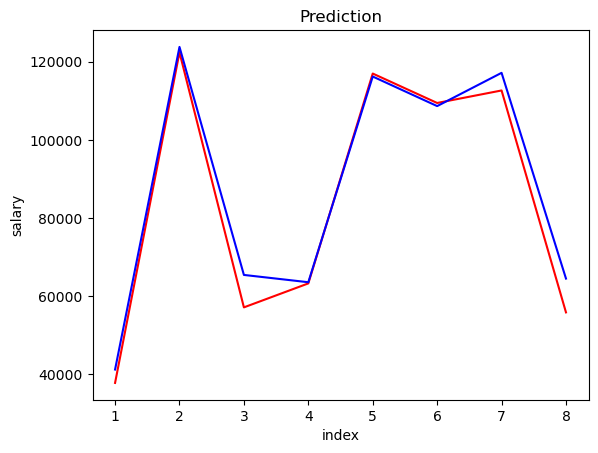

In [33]:
c = [i for i in range (1,len(test_target)+1,1)]
plt.plot(c,test_target,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('index')
plt.ylabel('salary')
plt.title('Prediction')
plt.show()

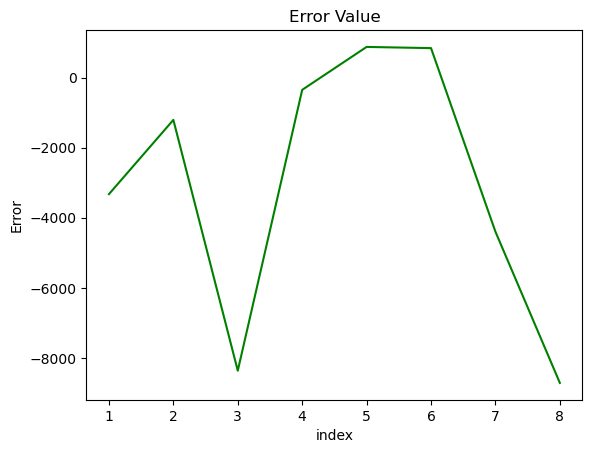

In [21]:
c = [i for i in range(1,len(test_target)+1,1)]
plt.plot(c,test_target - y_pred, color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [20]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, y_pred)
print(mae)

3508.5455930660555


In [24]:
# calculate Mean square error
mse = mean_squared_error(test_target,y_pred)

In [25]:
# Calculate R square vale
rsq = r2_score(test_target,y_pred)

In [26]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 22407940.143340684
r square : 0.9779208335417602


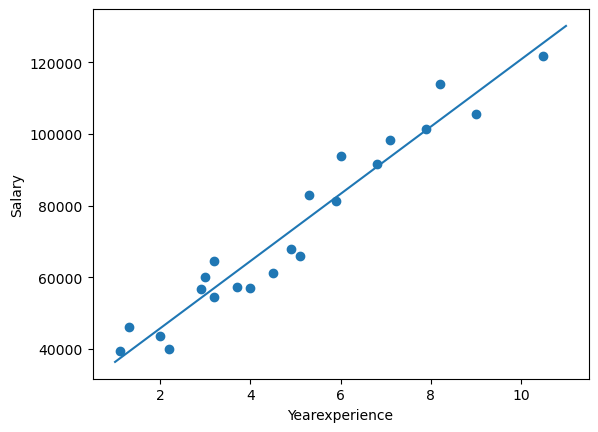

In [27]:
plt.scatter(train_input, train_target)
#훈련 데이터 선점도
plt.plot([1,11], [1*lr.coef_ + lr.intercept_, 11 * lr.coef_ + lr.intercept_])
plt.xlabel('Yearexperience')
plt.ylabel('Salary')
plt.show()

In [15]:

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input **2, test_input))
print(train_poly.shape, test_poly.shape)

(22, 2) (8, 2)


In [29]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)

[  11.3196933  9256.08140454] 27249.77527577361


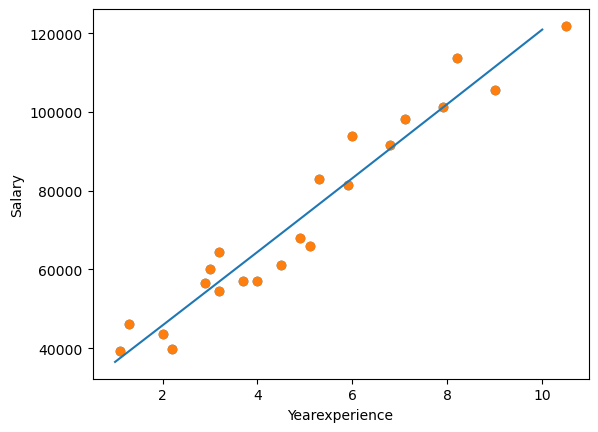

In [30]:
#다항식의 산점도
plt.scatter(train_input, train_target)
point = np.arange(1, 11)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0] * point **2 + lr.coef_[1]*point + lr.intercept_)
plt.xlabel('Yearexperience')
plt.ylabel('Salary')
plt.show()

In [32]:
y_pred = lr.predict(test_poly)
y_pred
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, y_pred)
print(mae)
# calculate Mean square error
mse = mean_squared_error(test_target,y_pred)
# Calculate R square vale
rsq = r2_score(test_target,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

3522.039840571908
mean squared error : 22433871.742746525
r square : 0.977895282415858


In [21]:
from sklearn.svm import SVR

rg_svm = SVR()
rg_svm.fit(train_input, train_target)

y_pred = lr.predict(test_input)
y_pred
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, y_pred)
print(mae)
# calculate Mean square error
mse = mean_squared_error(test_target,y_pred)
# Calculate R square vale
rsq = r2_score(test_target,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

3508.5455930660555
mean squared error : 22407940.143340684
r square : 0.9779208335417602


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_rg = RandomForestRegressor(random_state=0)
rf_rg.fit(train_input, train_target)

y_pred = lr.predict(test_input)
y_pred
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, y_pred)
print(mae)
# calculate Mean square error
mse = mean_squared_error(test_target,y_pred)
# Calculate R square vale
rsq = r2_score(test_target,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)


--- Radom Forest ---
3508.5455930660555
mean squared error : 22407940.143340684
r square : 0.9779208335417602
